In [25]:
import numpy as np
import pandas as pd
import json
import os

In [2]:
with open('data_full.json') as file:
  data = json.loads(file.read())

# Loading out-of-scope intent data
val_oos = np.array(data['oos_val'])
train_oos = np.array(data['oos_train'])
test_oos = np.array(data['oos_test'])

# Loading other intents data
val_others = np.array(data['val'])
train_others = np.array(data['train'])
test_others = np.array(data['test'])

# Merging out-of-scope and other intent data
val = np.concatenate([val_oos,val_others])
train = np.concatenate([train_oos,train_others])
test = np.concatenate([test_oos,test_others])
data = np.concatenate([train,test,val])
data = data.T

text = data[0]
labels = data[1]

classes = np.unique(labels)

In [3]:
#convert_to_dataframe

data = pd.DataFrame({'text': text, 'intent': labels})
print(data)

                                                    text         intent
0                  how much is an overdraft fee for bank            oos
1      why are exponents preformed before multiplicat...            oos
2                    what size wipers does this car take            oos
3                                  where is the dipstick            oos
4                            how much is 1 share of aapl            oos
...                                                  ...            ...
23695  i was at walmart trying to buy toilet paper an...  card_declined
23696       target declined my card and i don't know why  card_declined
23697  do you know why my card was declined at target...  card_declined
23698  i can't figure out why my card was declined at...  card_declined
23699  i was just at target and they declined my card...  card_declined

[23700 rows x 2 columns]


In [4]:
with pd.option_context('display.max_rows', None):
    print(data.groupby("intent").count())
    
data.groupby("intent").count().shape

                           text
intent                         
accept_reservations         150
account_blocked             150
alarm                       150
application_status          150
apr                         150
are_you_a_bot               150
balance                     150
bill_balance                150
bill_due                    150
book_flight                 150
book_hotel                  150
calculator                  150
calendar                    150
calendar_update             150
calories                    150
cancel                      150
cancel_reservation          150
car_rental                  150
card_declined               150
carry_on                    150
change_accent               150
change_ai_name              150
change_language             150
change_speed                150
change_user_name            150
change_volume               150
confirm_reservation         150
cook_time                   150
credit_limit                150
credit_l

(151, 1)

In [5]:
#convert_to_lower_case

data["lower"] = data.text.map(lambda x : x.lower())

In [6]:
# import nltk
# nltk.download("punkt")
# nltk.download("stopwords")

In [7]:
#word_tokenize

from nltk import word_tokenize

data["tokenized"] = data.lower.map(word_tokenize)

In [8]:
#stopwords_remove

from nltk.corpus import stopwords
from string import punctuation

def remove_stop(strings, stop_list):
    classed = [s for s in strings if s not in stop_list]
    return classed

stop = stopwords.words("english")
stop_punc = list(set(punctuation)) + stop

data["selected"] = data.tokenized.map(lambda df: remove_stop(df, stop_punc))

In [9]:
#normalize

from nltk.stem import PorterStemmer

def normalize(text):
    return " ".join(text)

stemmer= PorterStemmer()

data["stemmed"] = data.selected.map(lambda xs: [stemmer.stem(x) for x in xs])
data["normalized"] = data.stemmed.apply(normalize)

data

,text,intent,lower,tokenized,selected,stemmed,normalized
0,how much is an overdraft fee for bank,oos,how much is an overdraft fee for bank,"[how, much, is, an, overdraft, fee, for, bank]","[much, overdraft, fee, bank]","[much, overdraft, fee, bank]",much overdraft fee bank
1,why are exponents preformed before multiplicat...,oos,why are exponents preformed before multiplicat...,"[why, are, exponents, preformed, before, multi...","[exponents, preformed, multiplication, order, ...","[expon, preform, multipl, order, oper]",expon preform multipl order oper
2,what size wipers does this car take,oos,what size wipers does this car take,"[what, size, wipers, does, this, car, take]","[size, wipers, car, take]","[size, wiper, car, take]",size wiper car take
3,where is the dipstick,oos,where is the dipstick,"[where, is, the, dipstick]",[dipstick],[dipstick],dipstick
4,how much is 1 share of aapl,oos,how much is 1 share of aapl,"[how, much, is, 1, share, of, aapl]","[much, 1, share, aapl]","[much, 1, share, aapl]",much 1 share aapl
...,...,...,...,...,...,...,...
23695,i was at walmart trying to buy toilet paper an...,card_declined,i was at walmart trying to buy toilet paper an...,"[i, was, at, walmart, trying, to, buy, toilet,...","[walmart, trying, buy, toilet, paper, card, go...","[walmart, tri, buy, toilet, paper, card, got, ...",walmart tri buy toilet paper card got declin
23696,target declined my card and i don't know why,card_declined,target declined my card and i don't know why,"[target, declined, my, card, and, i, do, n't, ...","[target, declined, card, n't, know]","[target, declin, card, n't, know]",target declin card n't know
23697,do you know why my card was declined at target...,card_declined,do you know why my card was declined at target...,"[do, you, know, why, my, card, was, declined, ...","[know, card, declined, target, ca, n't, figure]","[know, card, declin, target, ca, n't, figur]",know card declin target ca n't figur
23698,i can't figure out why my card was declined at...,card_declined,i can't figure out why my card was declined at...,"[i, ca, n't, figure, out, why, my, card, was, ...","[ca, n't, figure, card, declined, target]","[ca, n't, figur, card, declin, target]",ca n't figur card declin target


In [10]:
#train_test_split

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size = 0.15, random_state = 5)

In [11]:
#tf_tokenize

from tensorflow.keras.preprocessing.text import Tokenizer

max_num_words = 10000

tokenizer = Tokenizer(num_words = max_num_words)
tokenizer.fit_on_texts(train_data.normalized)

word_index = tokenizer.word_index

tokenized_train = tokenizer.texts_to_sequences(train_data.normalized)
tokenized_test = tokenizer.texts_to_sequences(test_data.normalized)

In [12]:
len(word_index)

5299

In [13]:
#max_len_of_sentences

maxLen = 0
for t in tokenized_train+tokenized_test:
    if len(t) > maxLen:
        maxLen = len(t)

maxLen

17

In [14]:
#padding

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(tokenized_train, maxlen = maxLen, padding = "post")
test_padded = pad_sequences(tokenized_test, maxlen = maxLen, padding = "post")

In [15]:
print(train_padded.shape, test_padded.shape)

(20145, 17) (3555, 17)


In [16]:
#one_hot_encoded_x

def transform_x(data, tokenizer):
    output_shape = [data.shape[0],
                  data.shape[1],
                  tokenizer.word_index.keys().__len__()]
    results = np.zeros(output_shape)
    
    for i in range(data.shape[0]):
        for ii in range(data.shape[1]):
            results[i, ii, data[i,ii]-1]= 1
    return results

xtr_transformed = transform_x(train_padded, tokenizer)
xts_transformed = transform_x(test_padded, tokenizer)

In [17]:
xtr_transformed.shape

(20145, 17, 5299)

In [18]:
#one_hot_encoded_y

from sklearn.preprocessing import OneHotEncoder as OHE

y_encoder = OHE().fit(np.array(train_data.intent).reshape(-1,1))

ytr_encoded = y_encoder.transform(np.array(train_data.intent).reshape(-1,1)).toarray()
yts_encoded = y_encoder.transform(np.array(test_data.intent).reshape(-1,1)).toarray()

In [19]:
ytr_encoded.shape

(20145, 151)

In [20]:
embeddings_index={}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [21]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
num_words = min(max_num_words, len(word_index))+1
embedding_dim=len(embeddings_index['the'])
embedding_matrix = np.random.normal(emb_mean, emb_std, (num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_num_words:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [28]:
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional, Embedding
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint


model = Sequential()

model.add(Embedding(num_words, 100, trainable=False, input_length=train_padded.shape[1], weights=[embedding_matrix]))

model.add(Bidirectional(LSTM(256, return_sequences=True, recurrent_dropout=0.1, dropout=0.1), 'concat'))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=False, recurrent_dropout=0.1, dropout=0.1))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(ytr_encoded.shape[1], activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [33]:
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

# checkpoint
filepath="models/weights-improvement-{epoch:02d}-{accuracy:.2f}.ckpt"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1,
                             save_weights_only=True, save_best_only=True, mode='max')

callbacks_list = [checkpoint, tb_callback]

In [34]:
import tensorflow as tf

with tf.device('/cpu:0'):
    history = model.fit(train_padded, ytr_encoded, epochs = 50,
          batch_size = 64, shuffle=True,
          validation_split = 0.15, callbacks = callbacks_list)
#with tf.device('/device:GPU:0'):

Epoch 1/50
268/268 [==============================] - 63s 234ms/step - loss: 0.0427 - accuracy: 0.0386 - val_loss: 0.0388 - val_accuracy: 0.0477

Epoch 1: accuracy improved from -inf to 0.03860, saving model to models\weights-improvement-01-0.04.ckpt
Epoch 2/50
268/268 [==============================] - 61s 226ms/step - loss: 0.0406 - accuracy: 0.0416 - val_loss: 0.0359 - val_accuracy: 0.0503

Epoch 2: accuracy improved from 0.03860 to 0.04164, saving model to models\weights-improvement-02-0.04.ckpt
Epoch 3/50
268/268 [==============================] - 61s 228ms/step - loss: 0.0359 - accuracy: 0.0649 - val_loss: 0.0295 - val_accuracy: 0.1224

Epoch 3: accuracy improved from 0.04164 to 0.06488, saving model to models\weights-improvement-03-0.06.ckpt
Epoch 4/50
268/268 [==============================] - 63s 236ms/step - loss: 0.0310 - accuracy: 0.1215 - val_loss: 0.0256 - val_accuracy: 0.2303

Epoch 4: accuracy improved from 0.06488 to 0.12153, saving model to models\weights-improvement-

Epoch 33/50
268/268 [==============================] - 59s 221ms/step - loss: 0.0037 - accuracy: 0.9230 - val_loss: 0.0081 - val_accuracy: 0.8521

Epoch 33: accuracy improved from 0.91982 to 0.92297, saving model to models\weights-improvement-33-0.92.ckpt
Epoch 34/50
268/268 [==============================] - 61s 229ms/step - loss: 0.0036 - accuracy: 0.9257 - val_loss: 0.0079 - val_accuracy: 0.8590

Epoch 34: accuracy improved from 0.92297 to 0.92566, saving model to models\weights-improvement-34-0.93.ckpt
Epoch 35/50
268/268 [==============================] - 62s 230ms/step - loss: 0.0036 - accuracy: 0.9242 - val_loss: 0.0091 - val_accuracy: 0.8385

Epoch 35: accuracy did not improve from 0.92566
Epoch 36/50
268/268 [==============================] - 67s 250ms/step - loss: 0.0036 - accuracy: 0.9244 - val_loss: 0.0077 - val_accuracy: 0.8584

Epoch 36: accuracy did not improve from 0.92566
Epoch 37/50
268/268 [==============================] - 65s 244ms/step - loss: 0.0031 - accuracy: 0

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_16 (ModuleWra (None, 17, 100)           530000    
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 17, 512)           731136    
_________________________________________________________________
module_wrapper_18 (ModuleWra (None, 17, 512)           0         
_________________________________________________________________
module_wrapper_19 (ModuleWra (None, 256)               787456    
_________________________________________________________________
module_wrapper_20 (ModuleWra (None, 256)               0         
_________________________________________________________________
module_wrapper_21 (ModuleWra (None, 50)                12850     
_________________________________________________________________
module_wrapper_22 (ModuleWra (None, 50)               

In [36]:
# import tensorflow as tf

# with tf.device('/cpu:0'):
#     history = model.fit(train_padded, ytr_encoded, epochs = 5,
#           batch_size = 64, shuffle=True,
#           validation_split = 0.15)
# #with tf.device('/device:GPU:0'):

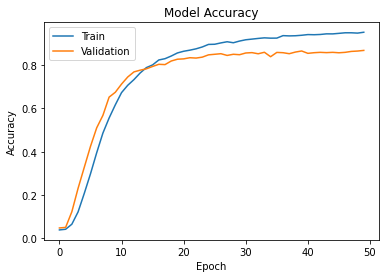

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

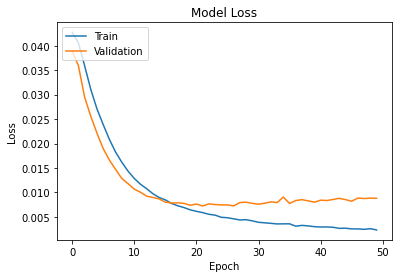

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
#performance_evaluation_train

from sklearn.metrics import classification_report

with tf.device('/cpu:0'):
    prediction = y_encoder.inverse_transform(model.predict(train_padded))
print(classification_report(train_data.intent, prediction))

                           precision    recall  f1-score   support

      accept_reservations       0.99      0.98      0.99       120
          account_blocked       0.97      0.92      0.94       126
                    alarm       0.99      0.99      0.99       129
       application_status       0.98      0.98      0.98       128
                      apr       0.99      0.99      0.99       125
            are_you_a_bot       0.97      0.96      0.97       133
                  balance       0.97      0.94      0.95       126
             bill_balance       0.98      0.96      0.97       123
                 bill_due       0.98      0.87      0.92       130
              book_flight       0.99      1.00      1.00       122
               book_hotel       0.98      0.98      0.98       131
               calculator       0.99      0.96      0.98       133
                 calendar       0.98      0.92      0.95       130
          calendar_update       0.92      0.98      0.95     

In [40]:
#performance_evaluation_test

from sklearn.metrics import classification_report

with tf.device('/cpu:0'):
    prediction_test = y_encoder.inverse_transform(model.predict(test_padded))
print(classification_report(test_data.intent, prediction_test))

                           precision    recall  f1-score   support

      accept_reservations       0.97      0.97      0.97        30
          account_blocked       0.73      0.92      0.81        24
                    alarm       1.00      1.00      1.00        21
       application_status       0.91      0.95      0.93        22
                      apr       0.92      0.96      0.94        25
            are_you_a_bot       0.89      0.94      0.91        17
                  balance       0.88      0.62      0.73        24
             bill_balance       0.87      0.74      0.80        27
                 bill_due       0.82      0.70      0.76        20
              book_flight       0.93      0.93      0.93        28
               book_hotel       0.78      0.95      0.86        19
               calculator       0.82      0.82      0.82        17
                 calendar       0.87      0.65      0.74        20
          calendar_update       0.90      1.00      0.95     

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
        model,
        test_padded,
        test_data.intent,
        display_labels=classes,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
disp.ax_.set_title(title)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

In [41]:
import keras
import pickle
import json

from keras.models import save_model

model.save('models/my_model')

with open('utils/classes.pkl','wb') as file:
   pickle.dump(classes,file)

with open('utils/tokenizer.pkl','wb') as file:
   pickle.dump(tokenizer,file)

with open('utils/label_encoder.pkl','wb') as file:
   pickle.dump(y_encoder,file)

INFO:tensorflow:Assets written to: models/my_model\assets


INFO:tensorflow:Assets written to: models/my_model\assets


<AxesSubplot:>

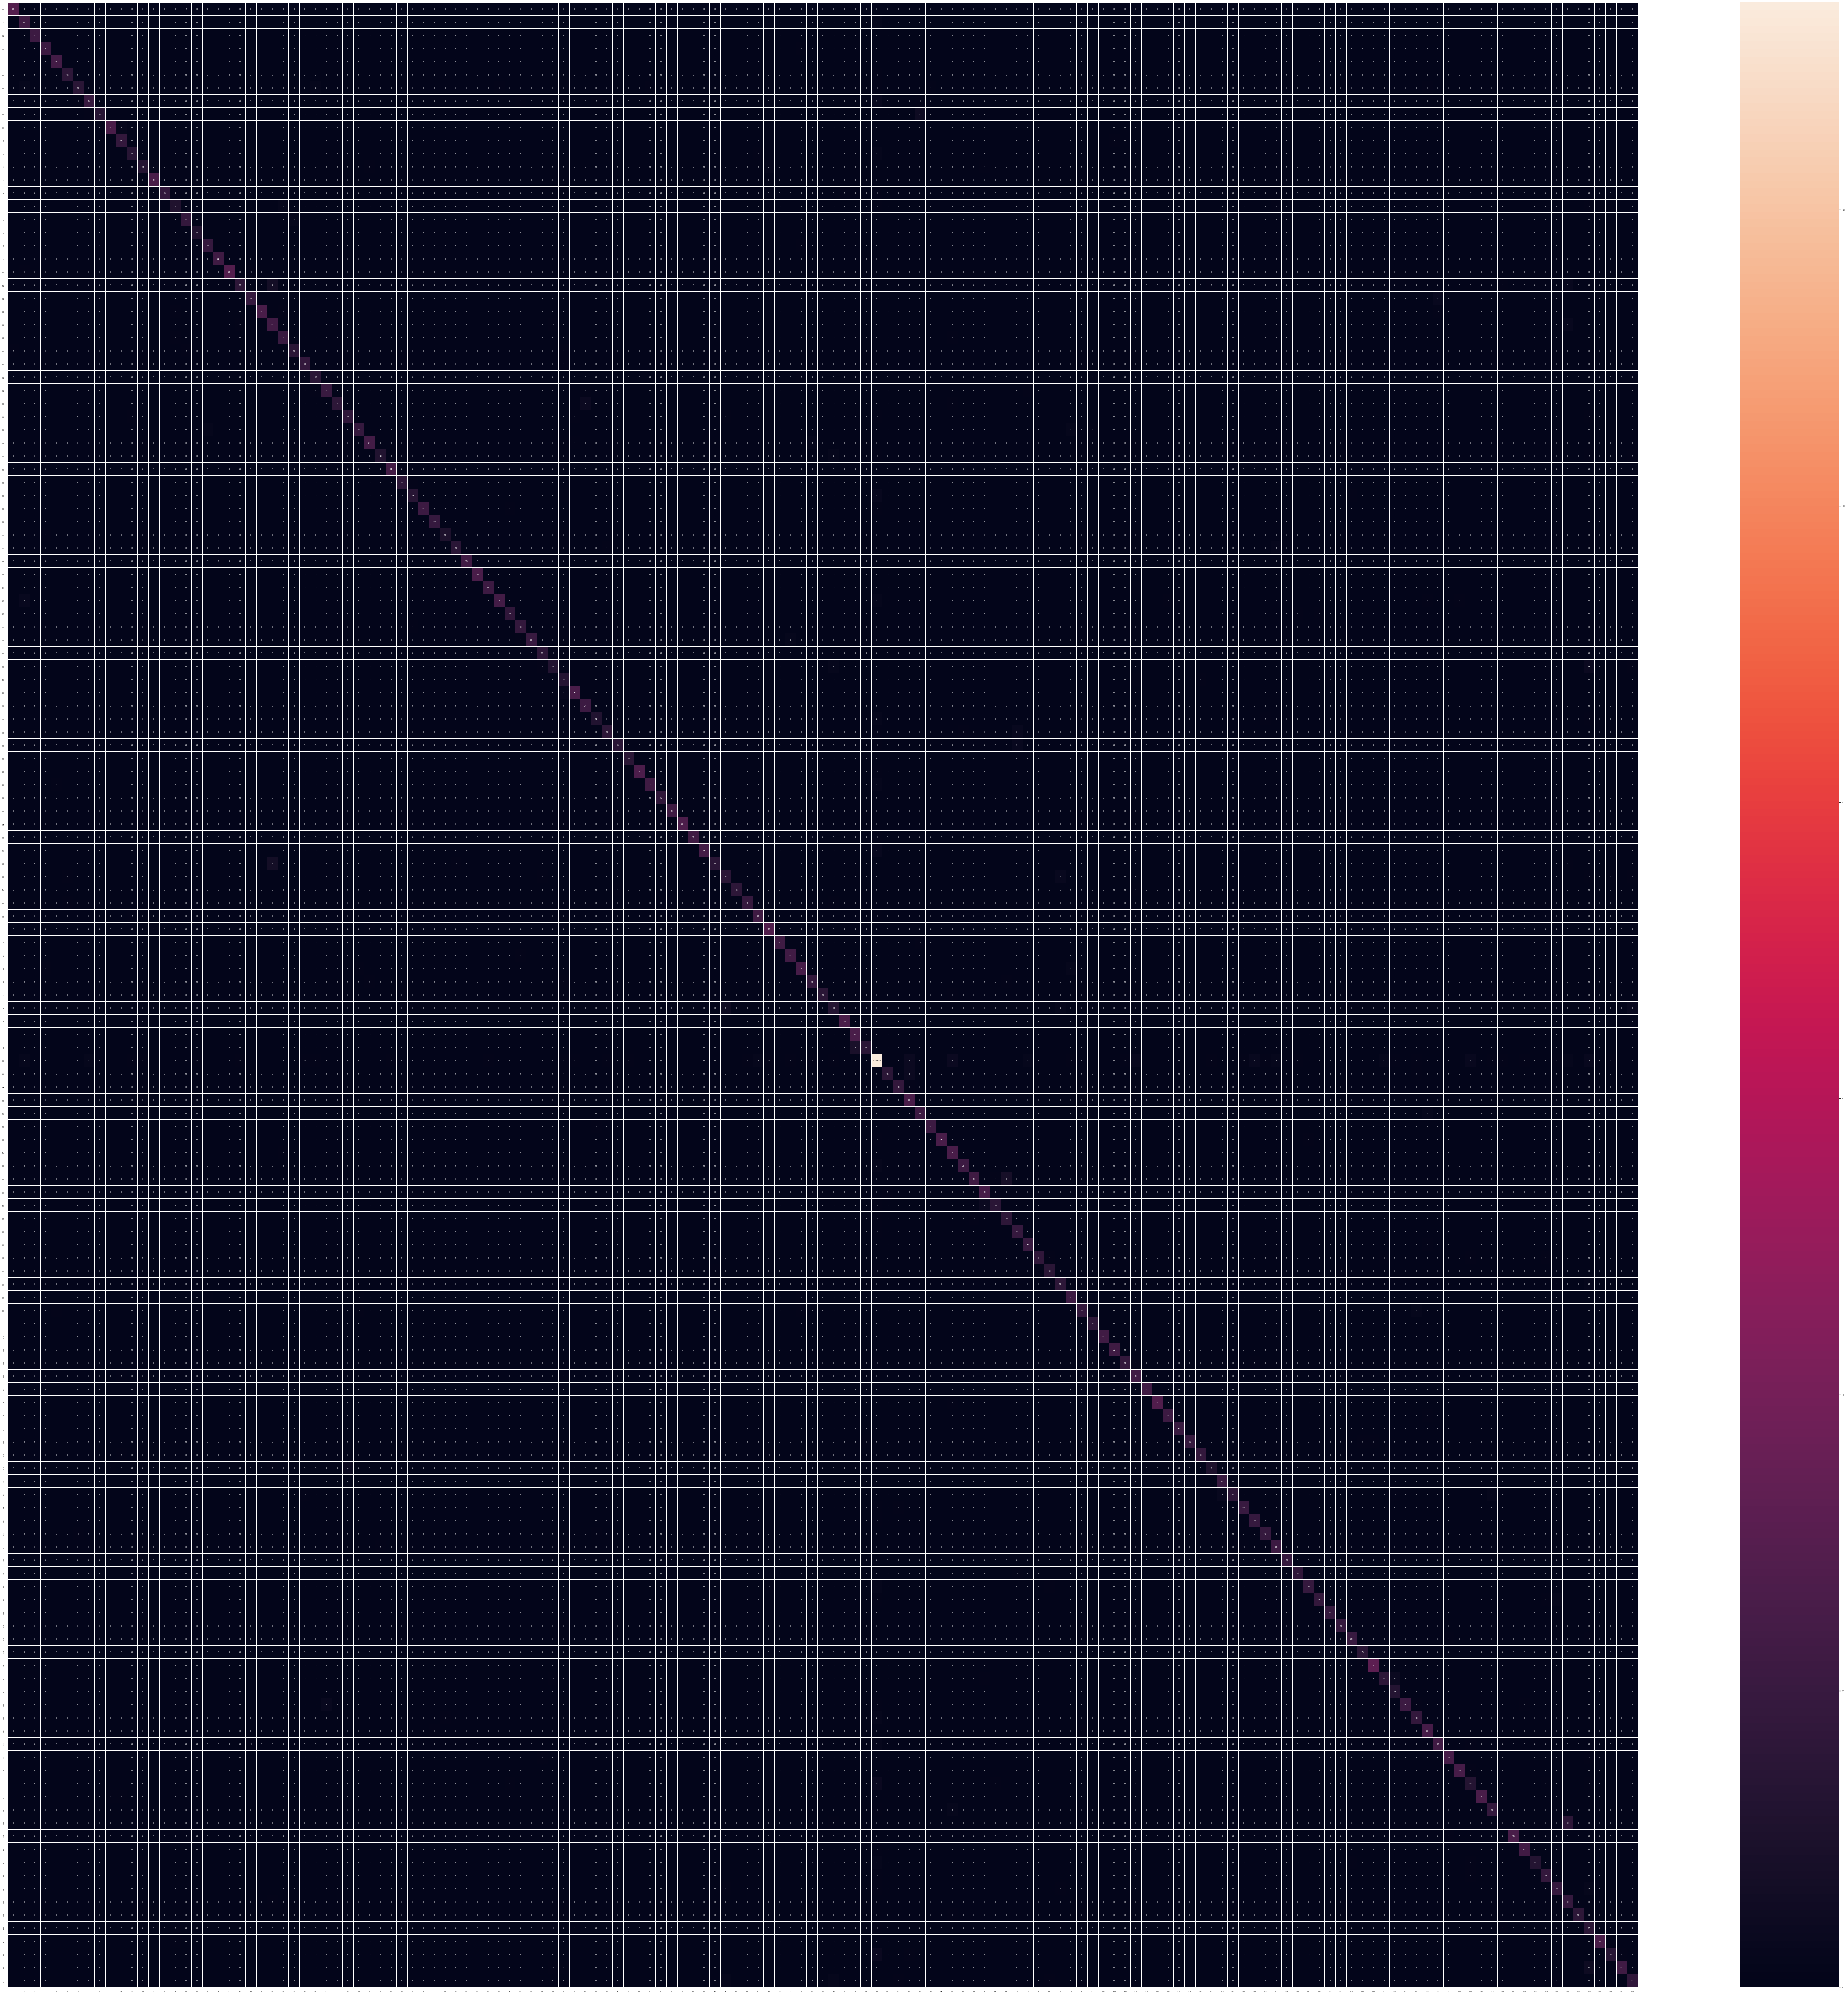

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_data.intent, prediction_test)

fig, ax = plt.subplots(figsize=(100,100))
sns.set(font_scale=0.5)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)